In [138]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, save_model
from keras import optimizers 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [139]:
batch_size = 32
epochs = 15

In [140]:
data_iter = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_data = data_iter.flow_from_directory(directory='ASL-Datasets/MLAB_test', target_size=(100, 100), batch_size=batch_size, subset='training')
val_data = data_iter.flow_from_directory(directory='ASL-Datasets/MLAB_test', target_size=(100, 100), batch_size=batch_size, subset='validation')


Found 7250 images belonging to 4 classes.
Found 1810 images belonging to 4 classes.


In [141]:

x, y = next(train_data)
y[0]


array([0., 0., 0., 1.], dtype=float32)

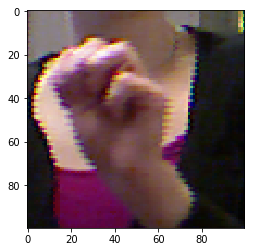

In [142]:
plt.imshow(x[0])

In [143]:
train_data.classes
np.unique(train_data.classes)

array([0, 1, 2, 3], dtype=int32)

In [150]:
pretrained_model = VGG16(include_top=False, weights='imagenet', input_shape=(100, 100, 3), pooling='max')
pretrained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [151]:
trainable_layer_count = 4

for layer in range(len(pretrained_model.layers) - trainable_layer_count):
    pretrained_model.layers.pop()
    
for layer in pretrained_model.layers:
    layer.trainable = True


In [152]:
pretrained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [153]:
model = Sequential()
model.add(pretrained_model)
model.add(Dense(215, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [154]:
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               38720     
_________________________________________________________________
dense_17 (Dense)             (None, 215)               110295    
_________________________________________________________________
dropout_9 (Dropout)          (None, 215)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 864       
Total params: 149,879
Trainable params: 149,879
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.fit_generator(
        train_data,
        epochs=epochs,
        validation_data=val_data, 
        steps_per_epoch=len(train_data),
        validation_steps=len(val_data))

Epoch 1/15
227/227 [==============================] - 44s 194ms/step - loss: 0.5315 - acc: 0.7990 - val_loss: 0.1700 - val_acc: 0.9475
Epoch 2/15
227/227 [==============================] - 43s 188ms/step - loss: 0.1539 - acc: 0.9493 - val_loss: 0.0825 - val_acc: 0.9812
Epoch 3/15
227/227 [==============================] - 43s 190ms/step - loss: 0.0896 - acc: 0.9699 - val_loss: 0.0425 - val_acc: 0.9917
Epoch 4/15
227/227 [==============================] - 43s 190ms/step - loss: 0.0514 - acc: 0.9850 - val_loss: 0.0352 - val_acc: 0.9873
Epoch 5/15
227/227 [==============================] - 43s 190ms/step - loss: 0.0388 - acc: 0.9864 - val_loss: 0.0191 - val_acc: 0.9967
Epoch 6/15
227/227 [==============================] - 43s 190ms/step - loss: 0.0310 - acc: 0.9902 - val_loss: 0.0226 - val_acc: 0.9945
Epoch 7/15
227/227 [==============================] - 43s 190ms/step - loss: 0.0258 - acc: 0.9926 - val_loss: 0.0147 - val_acc: 0.9961
Epoch 8/15
227/227 [==============================] - 4

In [13]:
#test2_iter = ImageDataGenerator(rescale=1./255)
#test_data2 = test2_iter.flow_from_directory(directory='ASL-Datasets/new_test_data', target_size=(150, 150), batch_size=1)

#model.evaluate_generator(test_data2, steps=len(test_data2))


In [180]:
model.save('my_model.h5')

KeyError: 'global_max_pooling2d_10_ib-0'

In [ ]:
#loaded_model = model('my_model.h5')
#loaded_model.summary()

In [173]:
def process_image(path):
    image2 = image.load_img(path, target_size=(100, 100))
    image2 = image.img_to_array(image2) / 255
    image2 = np.expand_dims(image2, axis=0)
    return image2
alphabet = ['A', 'B', 'L', 'M']

In [177]:
path_A = 'ASL-Datasets/arnav_test/predict/a.jpg'
path_B = 'ASL-Datasets/arnav_test/predict/b.jpg'
path_L = 'ASL-Datasets/arnav_test/predict/l.jpg'
path_M = 'ASL-Datasets/arnav_test/predict/m.jpg'
paths = [path_M, path_L, path_A, path_B]
images = [process_image(path) for path in paths]
predictions = [model.predict(image) for image in images]

In [178]:
#print("Confidence: " + str(max(prediction[0])))
string = ''
for prediction in predictions:
    arg = np.argmax(prediction[0])
    string += alphabet[arg]
    
string

'MLAB'